In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
from tensorflow.keras.utils import to_categorical
from glob import glob
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from PIL import Image

Using TensorFlow backend.


In [2]:
df=pd.read_csv("/Users/ishashree/Downloads/HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [4]:
df.fillna(int(df['age'].mean()),inplace=True)
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [5]:
lesion_type_list={
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_list='/Users/ishashree/Downloads/dataverse_files'

img_id_list={os.path.splitext(os.path.basename(x))[0]:x
             for x in glob(os.path.join(base_skin_list, '*', '*.jpg'))
    
}

In [6]:
df['path'] = df['image_id'].map(img_id_list.get)
df['cell_type'] = df['dx'].map(lesion_type_list.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,2


In [7]:
l=lambda x: np.asarray(Image.open(x).resize((125,100)))

In [8]:
df['image'] = df['path'].map(l)

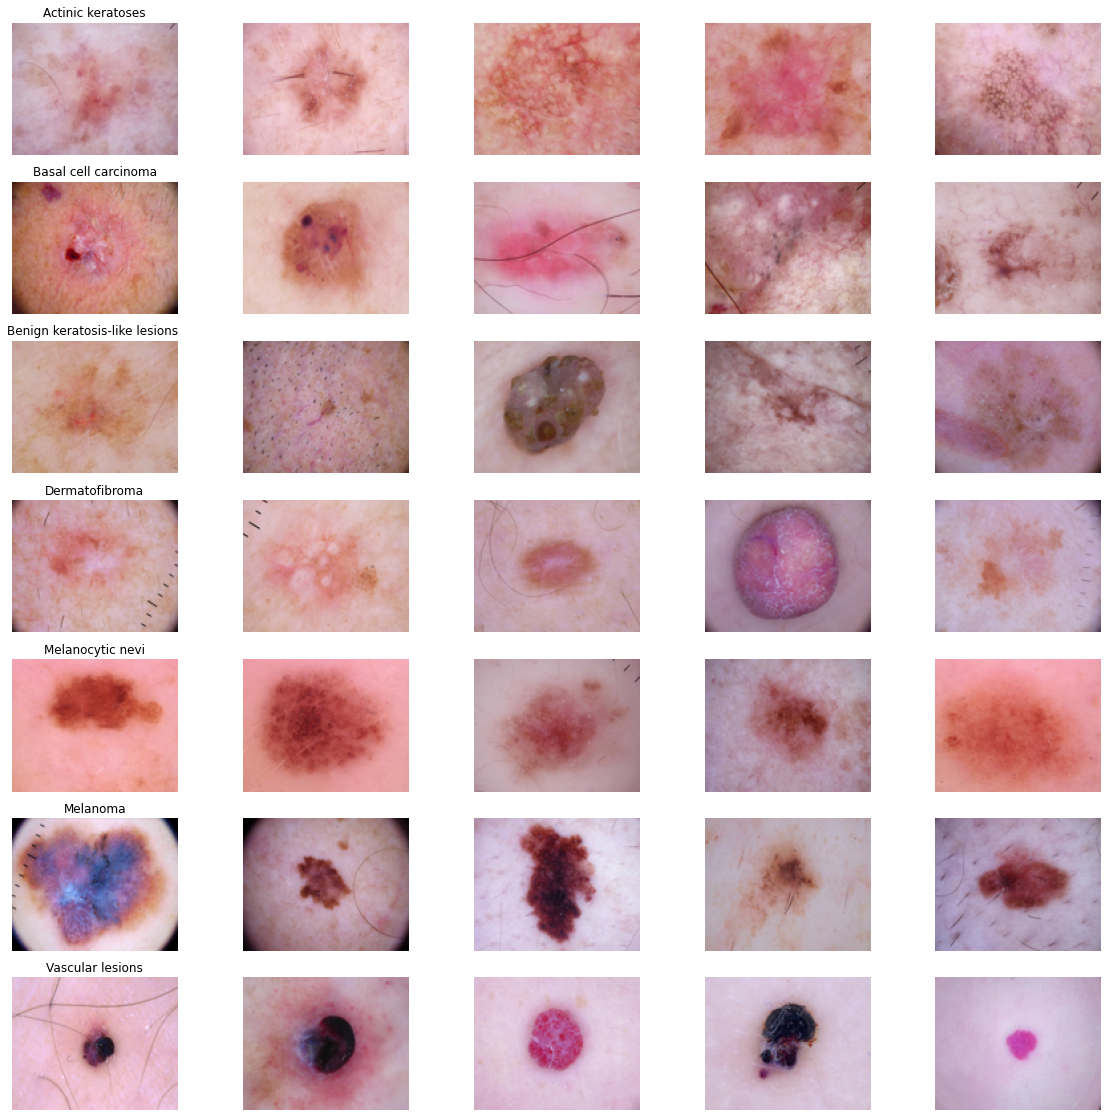

In [9]:
img_num=5
figure,m_axis=plt.subplots(7,img_num,figsize = (20,20))
for n_axis, (type_name, type_rows) in zip(m_axis, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axis[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axis, type_rows.sample(img_num, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


/Users/ishashree/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


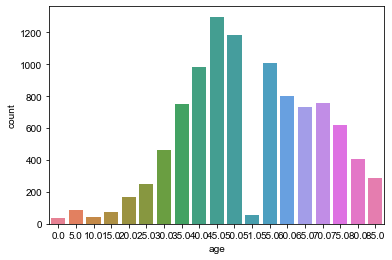

In [10]:
sn.countplot(df["age"],palette='husl')
sn.set(rc={'figure.figsize':(20.7,8.27)})


/Users/ishashree/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


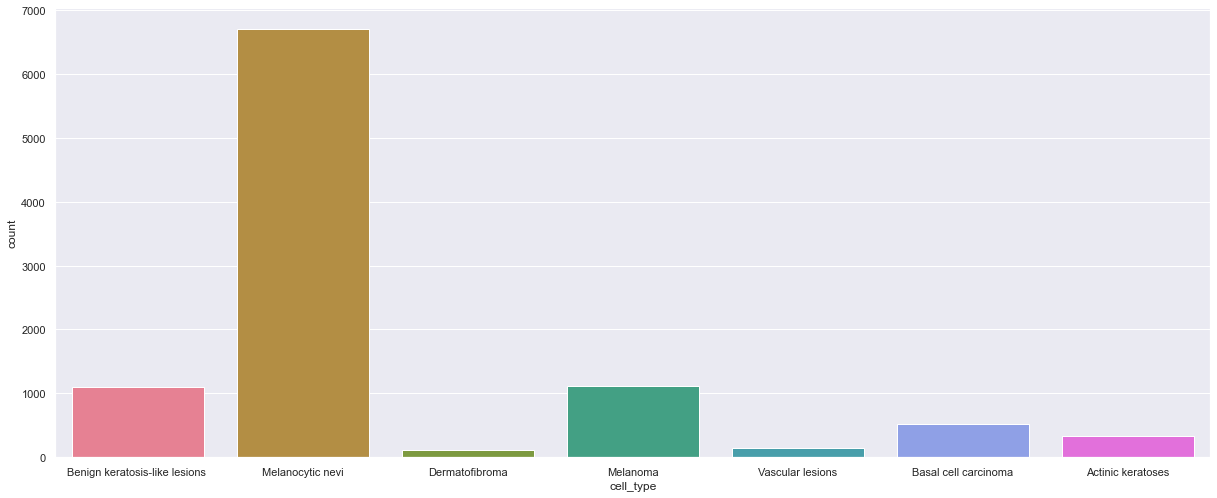

In [11]:
sn.countplot(df["cell_type"],palette='husl')

sn.set(rc={'figure.figsize':(15.7,8.27)})

/Users/ishashree/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


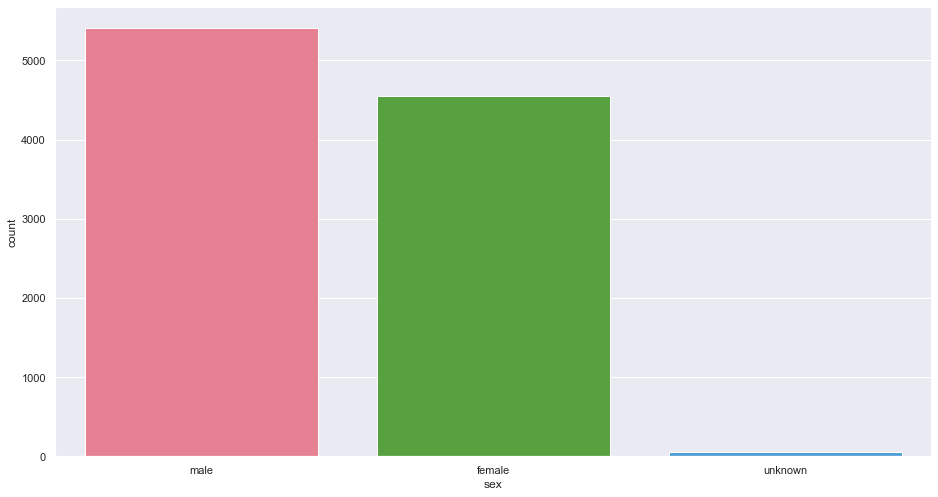

In [12]:
sn.countplot(df["sex"],palette='husl')

sn.set(rc={'figure.figsize':(15.7,8.27)})

/Users/ishashree/opt/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


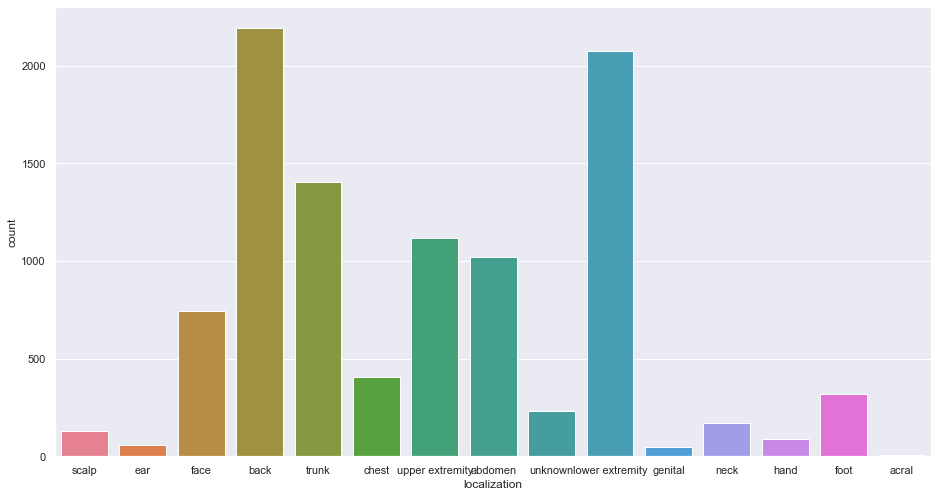

In [13]:
ax=sn.countplot(df["localization"],palette='husl')
ax=sn.set(rc={'figure.figsize':(37.7,8.27)})

### 1) Most effected age is 45 years
### 2) Most common type is 'Melanocytic nevi'
### 3) Mostly men are effected by lesion
### 4) Mostly occures in back followed by lower extremity

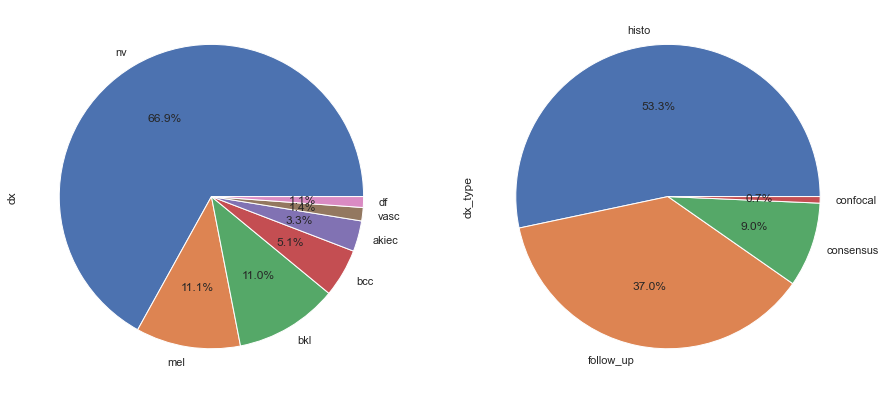

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Type of skin disease:
##### nv: Melanocytic nevi - 69.9%
##### mel: Melanoma - 11.1 %
##### bkl: Benign keratosis-like lesions - 11.0%
##### bcc: Basal cell carcinoma - 5.1%
##### akiec: Actinic keratoses- 3.3%
##### vasc: Vascular lesions-1.4%
##### df: Dermatofibroma - 1.1%
###
###
### How the skin disease was discovered:
##### histo - histopathology - 53.3%
##### follow_up - follow up examination - 37.0%
##### consensus - expert consensus - 9.0%
##### confocal - confirmation by in-vivo confocal microscopy - 0.7%

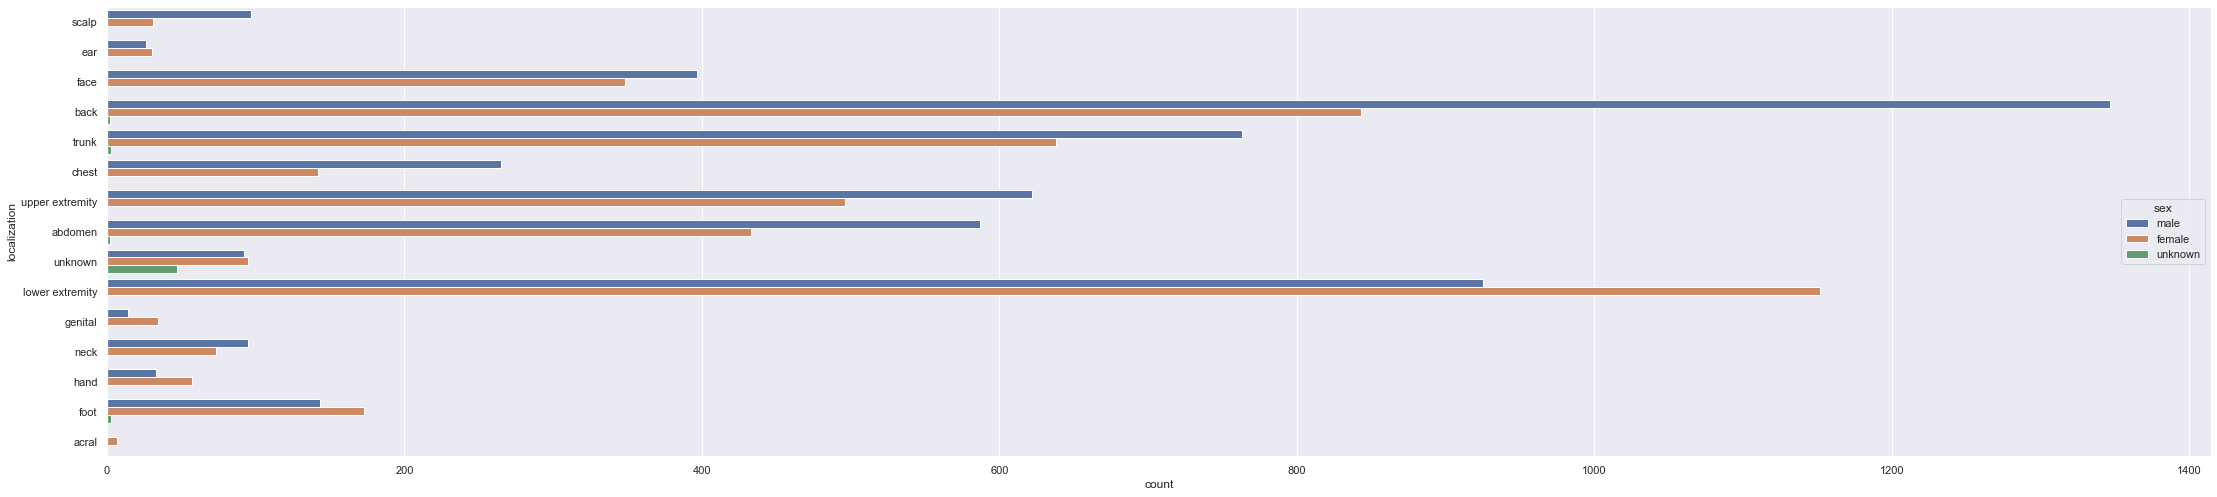

In [15]:
sn.countplot(y='localization', hue='sex', data=df)
sn.set(rc={'figure.figsize':(18.7,28.27)})

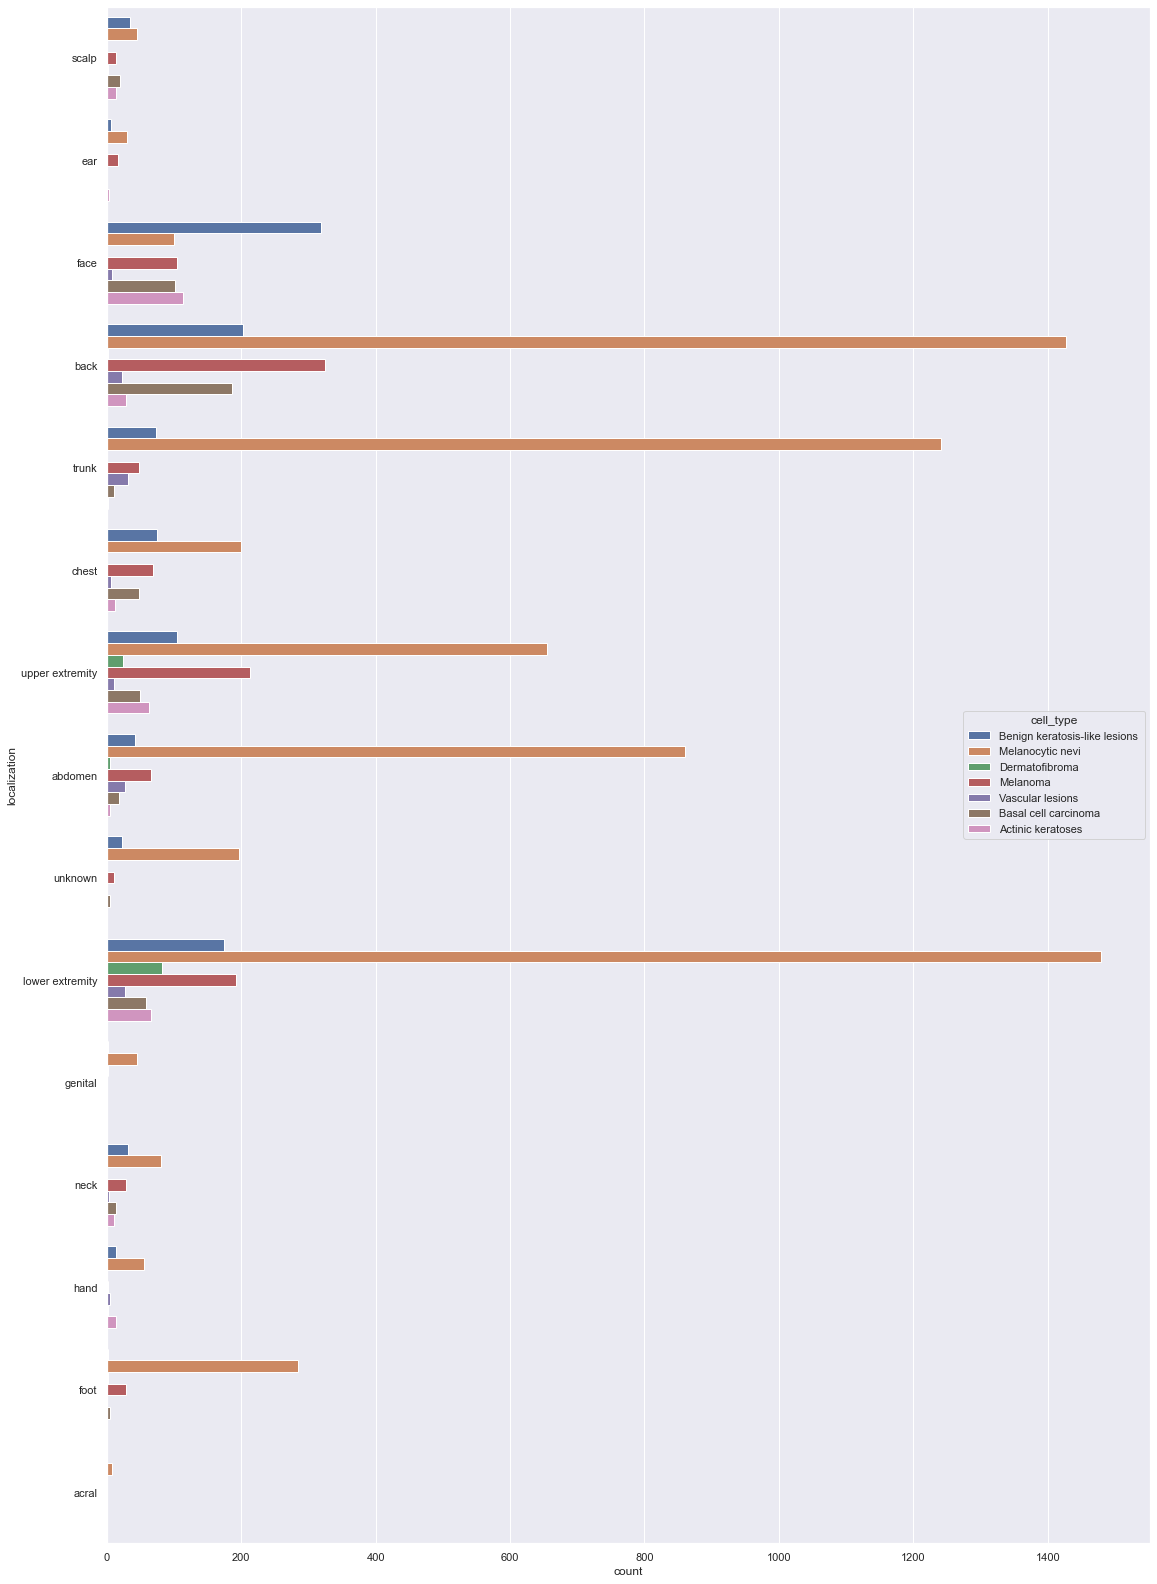

In [16]:
sn.countplot(y='localization', hue='cell_type', data=df)
sn.set(rc={'figure.figsize':(8.7,18.27)})

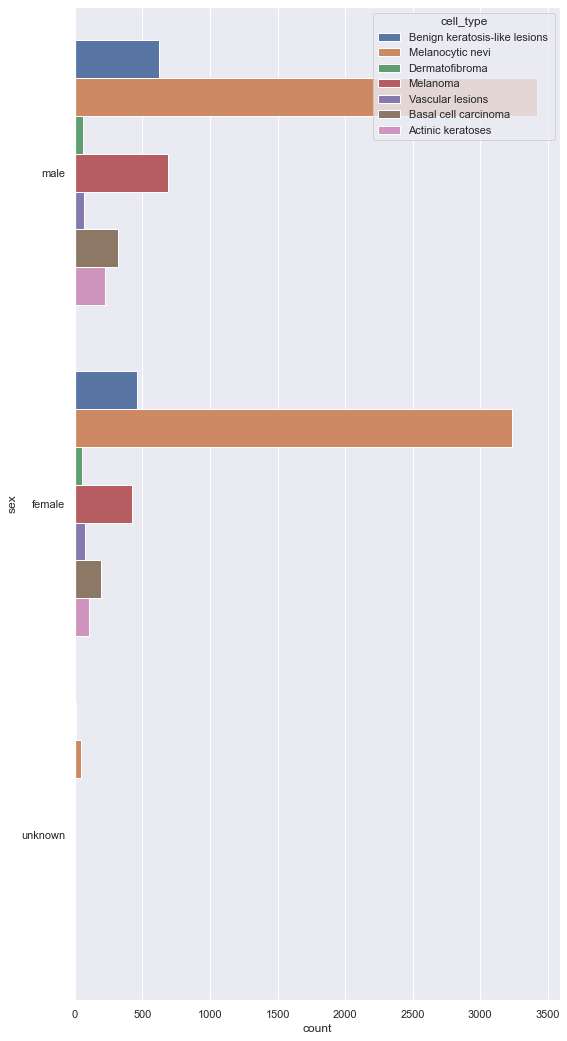

In [17]:
sn.countplot(y='sex', hue='cell_type', data=df)
sn.set(rc={'figure.figsize':(18.7,28.27)})

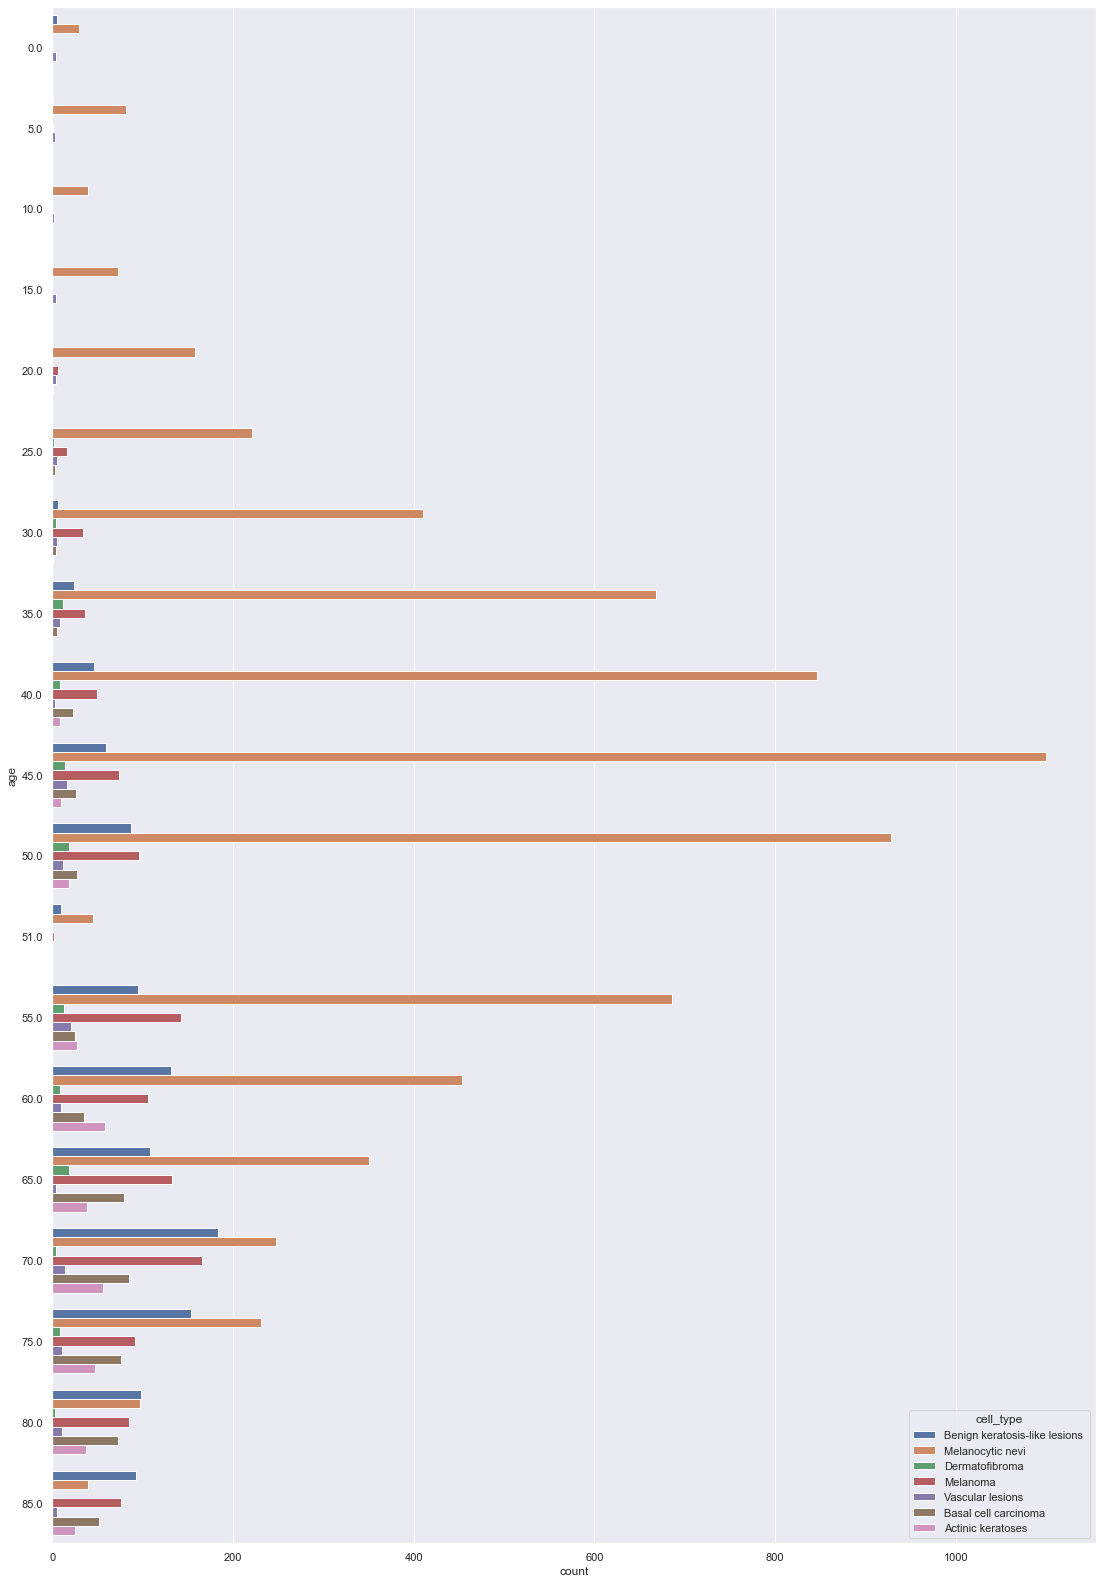

In [18]:
sn.countplot(y='age', hue='cell_type', data=df)
sn.set(rc={'figure.figsize':(18.7,28.27)})

In [19]:
feature=df.drop(['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [20]:
feature.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/Users/ishashree/Downloads/dataverse_files/HAM...,Benign keratosis-like lesions,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


In [21]:
from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(feature, target,test_size=0.25,random_state=669)

In [22]:
x_train=np.asarray(x_train_o["image"].tolist())
x_test=np.asarray(x_test_o["image"].tolist())

x_train_mean=np.mean(x_train)
x_test_mean=np.mean(x_test)

x_train_std=np.std(x_train)
x_test_std=np.std(x_test)

x_train=(x_train-x_train_mean)/x_train_std
x_test=(x_test-x_test_mean)/x_test_std

In [23]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [24]:
x_train.shape

(7511, 100, 125, 3)

In [25]:
x_test.shape

(2504, 100, 125, 3)

In [26]:
x_train = x_train.reshape(7511,125*100*3)
x_train.shape

(7511, 37500)

In [27]:
x_test = x_test.reshape(2504,125*100*3)
x_test.shape

(2504, 37500)

In [28]:
import keras
import tensorflow
model=keras.Sequential([
   #keras.layers.Flatten(input_shape=(100,125,3)),
    keras.layers.Dense(64,input_dim = 37500,kernel_initializer = 'uniform',activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(7,activation='softmax')
])
optimizer=tensorflow.keras.optimizers.Adam(
    learning_rate=0.00075,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)
model.compile(optimizer=optimizer,
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
model.fit(x_train,y_train,batch_size = 10, epochs = 50)

Epoch 1/50
7511/7511 [==============================] - 15s 2ms/step - loss: 1.2598 - accuracy: 0.6297
Epoch 2/50
7511/7511 [==============================] - 15s 2ms/step - loss: 0.9975 - accuracy: 0.6673
Epoch 3/50
7511/7511 [==============================] - 15s 2ms/step - loss: 0.9424 - accuracy: 0.6721
Epoch 4/50
7511/7511 [==============================] - 15s 2ms/step - loss: 0.9074 - accuracy: 0.6813
Epoch 5/50
7511/7511 [==============================] - 15s 2ms/step - loss: 0.8806 - accuracy: 0.6863
Epoch 6/50
7511/7511 [==============================] - 18s 2ms/step - loss: 0.8771 - accuracy: 0.6891
Epoch 7/50
7511/7511 [==============================] - 15s 2ms/step - loss: 0.8525 - accuracy: 0.6979
Epoch 8/50
7511/7511 [==============================] - 14s 2ms/step - loss: 0.8301 - accuracy: 0.7007
Epoch 9/50
7511/7511 [==============================] - 14s 2ms/step - loss: 0.8210 - accuracy: 0.7062
Epoch 10/50
7511/7511 [==============================] - 14s 2ms/step - l

In [29]:
accuracy = model.evaluate(x_test, y_test, verbose=1)[1]
print("Test: accuracy = ",accuracy*100,"%")

2504/2504 [==============================] - 1s 365us/step
Test: accuracy =  71.64536714553833 %


# Model using MobileNet

In [30]:
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [31]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((450,600))))

In [32]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [34]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100,125,3))
x_test = x_test.reshape(x_test.shape[0], *(100,125,3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100,125,3))

In [35]:
mobile = tensorflow.keras.applications.mobilenet.MobileNet()


In [36]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [37]:
def change_model(model, new_input_shape=(None, 40, 40, 3),custom_objects=None):
    # replace input shape of first layer
    
    config = model.layers[0].get_config()
    config['batch_input_shape']=new_input_shape
    model._layers[0]=model.layers[0].from_config(config)

    # rebuild model architecture by exporting and importing via json
    new_model = tensorflow.keras.models.model_from_json(model.to_json(),custom_objects=custom_objects)

    # copy weights from old model to new one
    for layer in new_model._layers:
        try:
            layer.set_weights(model.get_layer(name=layer.name).get_weights())
            print("Loaded layer {}".format(layer.name))
        except:
            print("Could not transfer weights for layer {}".format(layer.name))

    return new_model

In [38]:
new_model = change_model(mobile, new_input_shape=[None] + [100,125,3])
new_model.summary()

Loaded layer input_1
Loaded layer conv1_pad
Loaded layer conv1
Loaded layer conv1_bn
Loaded layer conv1_relu
Loaded layer conv_dw_1
Loaded layer conv_dw_1_bn
Loaded layer conv_dw_1_relu
Loaded layer conv_pw_1
Loaded layer conv_pw_1_bn
Loaded layer conv_pw_1_relu
Loaded layer conv_pad_2
Loaded layer conv_dw_2
Loaded layer conv_dw_2_bn
Loaded layer conv_dw_2_relu
Loaded layer conv_pw_2
Loaded layer conv_pw_2_bn
Loaded layer conv_pw_2_relu
Loaded layer conv_dw_3
Loaded layer conv_dw_3_bn
Loaded layer conv_dw_3_relu
Loaded layer conv_pw_3
Loaded layer conv_pw_3_bn
Loaded layer conv_pw_3_relu
Loaded layer conv_pad_4
Loaded layer conv_dw_4
Loaded layer conv_dw_4_bn
Loaded layer conv_dw_4_relu
Loaded layer conv_pw_4
Loaded layer conv_pw_4_bn
Loaded layer conv_pw_4_relu
Loaded layer conv_dw_5
Loaded layer conv_dw_5_bn
Loaded layer conv_dw_5_relu
Loaded layer conv_pw_5
Loaded layer conv_pw_5_bn
Loaded layer conv_pw_5_relu
Loaded layer conv_pad_6
Loaded layer conv_dw_6
Loaded layer conv_dw_6_bn


In [39]:
#model Architecture 
x = new_model.layers[-6].output
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=new_model.input, outputs=predictions)

In [40]:
# We need to choose how many layers we actually want to be trained.
# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False



In [41]:
# Defining Top2 and Top3 Accuracy
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [42]:
optimizer=tensorflow.keras.optimizers.Adam(
    learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])


In [43]:
class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Tried to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}


In [44]:
print(x_train.shape)

(6083, 100, 125, 3)


In [45]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


In [46]:
filepath = "model.h5"
batch_size=16
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), 
                              class_weight=class_weights,
                    validation_data=(x_validate,y_validate),steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=10, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/10
379/380 [============================>.] - ETA: 1s - loss: 1.7820 - categorical_accuracy: 0.6548 - top_2_accuracy: 0.7713 - top_3_accuracy: 0.8524
Epoch 00001: val_top_3_accuracy improved from -inf to 0.80917, saving model to model.h5
380/380 [==============================] - 525s 1s/step - loss: 1.7820 - categorical_accuracy: 0.6547 - top_2_accuracy: 0.7714 - top_3_accuracy: 0.8523 - val_loss: 2.0172 - val_categorical_accuracy: 0.6583 - val_top_2_accuracy: 0.7530 - val_top_3_accuracy: 0.8092
Epoch 2/10
379/380 [============================>.] - ETA: 1s - loss: 1.2927 - categorical_accuracy: 0.7002 - top_2_accuracy: 0.8316 - top_3_accuracy: 0.9124
Epoch 00002: val_top_3_accuracy improved from 0.80917 to 0.84172, saving model to model.h5
380/380 [==============================] - 540s 1s/step - loss: 1.2905 - categorical_accuracy: 0.7007 - top_2_accuracy: 0.8317 - top_3_accuracy: 0.9123 - val_loss: 2.3068 - val_categorical_accuracy: 0.6583 - val_top_2_accuracy: 0.7574 - val_

In [54]:
model.metrics_names

['loss', 'categorical_accuracy', 'top_2_accuracy', 'top_3_accuracy']

In [55]:
val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate(datagen.flow(x_test,y_test, batch_size=16) )

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

157/157 [==============================] - 39s 246ms/step - loss: 2.4224 - categorical_accuracy: 0.6781 - top_2_accuracy: 0.8075 - top_3_accuracy: 0.8762
val_loss: 2.422417034389107
val_cat_acc: 0.678115
val_top_2_acc: 0.807508
val_top_3_acc: 0.87619805


In [56]:
model.load_weights('model.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(datagen.flow(x_test,y_test, batch_size=16) 
                        )

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

val_loss: 2.4571973823817674
val_cat_acc: 0.678115
val_top_2_acc: 0.8055112
val_top_3_acc: 0.8742013


In [57]:
predictions = model.predict_generator(datagen.flow(x_test,y_test, batch_size=16), verbose=1)

157/157 [==============================] - 49s 311ms/step
